In [122]:
import pandas as pd
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
import unicodedata
from nltk.tokenize import word_tokenize
import string
import contractions
from nltk.corpus import stopwords

In [64]:
df = pd.read_json('../scrapy/ssc/ssc_data.json')
df.head()

,date,title,author,num_comments,content
0,NaT,Archives | Slate Star Codex,None,11 Responses to,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<d..."
1,NaT,Advertise | Slate Star Codex,None,None,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
2,NaT,Mistakes | Slate Star Codex,None,40 Responses to,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
3,NaT,Comments | Slate Star Codex,None,138 Responses to,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
4,NaT,\n\tComments for Slate Star Codex\t,None,None,None


In [65]:
df.isna().sum()

date             9
title            0
author           9
num_comments    13
content          5
dtype: int64

In [66]:
df = df[~df.date.isna()]

In [67]:
df.isna().sum()

date            0
title           0
author          0
num_comments    8
content         1
dtype: int64

In [68]:
#exclude recent data
df = df[df['date']<'04-15-2020']

In [69]:
#fix comments
df['num_comments'] = df['num_comments'].fillna('0 Responses to')
for k,v in {' Responses to': '', ',' :'', 'One': '1', 'Response to':''}.items():
    df['num_comments'] = df['num_comments'].str.replace(k,v)
df['num_comments'] = df['num_comments'].astype(int)

In [79]:
#fix title
df.title = df.title.str.replace(' \| Slate Star Codex', '')

In [80]:
df.head()

,date,title,author,num_comments,content
15,2020-04-14,"A Failure, But Not Of Prediction",Scott Alexander,894,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
16,2020-04-08,2019 Predictions: Calibration Results,Scott Alexander,92,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
17,2020-04-12,Open Thread 151.5,a reader,1306,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
18,2020-04-07,Never Tell Me The Odds (Ratio),Scott Alexander,19,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."
19,2020-04-06,SSCJC: Real World Depression Measurement,Scott Alexander,65,"<div class=""pjgm-postcontent"">\n\t\t\t\t\t\t<p..."


In [102]:
def fix_content(content):
    soup = BeautifulSoup(content, 'html.parser')
    text = soup.get_text() 
    text = unicodedata.normalize("NFKD", text) 
    text = text.replace('\n', ' ')
    return text
    

In [108]:
df['content'] = df['content'].apply(fix_content)

In [109]:
df.head()

,date,title,author,num_comments,content
15,2020-04-14,"A Failure, But Not Of Prediction",Scott Alexander,894,I. Vox asks What Went Wrong With The Media’s ...
16,2020-04-08,2019 Predictions: Calibration Results,Scott Alexander,92,"At the beginning of every year, I make predic..."
17,2020-04-12,Open Thread 151.5,a reader,1306,This is the twice-weekly hidden open thread. ...
18,2020-04-07,Never Tell Me The Odds (Ratio),Scott Alexander,19,"[Epistemic status: low confidence, someone te..."
19,2020-04-06,SSCJC: Real World Depression Measurement,Scott Alexander,65,The largest non-pharma antidepressant trial e...


In [110]:
#posts with most comments

In [113]:
df.sort_values(by='num_comments', ascending=False).head(10)

,date,title,author,num_comments,content
855,2016-09-28,"SSC Endorses Clinton, Johnson, Or Stein",Scott Alexander,2317,"I. If you are American, SSC endorses voting i..."
945,2016-04-11,OT47: OpenAI,Scott Alexander,2201,This is the bi-weekly open thread. Post abou...
657,2017-08-13,OT82: Threado Quia Absurdum,Scott Alexander,2164,This is the bi-weekly visible open thread. P...
890,2016-07-31,OT55: Thready For Hillary,Scott Alexander,2121,This is the bi-weekly visible open thread. T...
753,2017-05-01,Neutral vs. Conservative: The Eternal Struggle,Scott Alexander,1910,I. Vox’s David Roberts writes about Donald Tr...
145,2019-09-24,Open Thread 137.25,Scott Alexander,1836,"This is the twice-weekly hidden open thread, ..."
833,2016-11-20,OT63: Open Pit Mining,Scott Alexander,1820,This is the bi-weekly visible open thread. T...
965,2016-02-28,OT44: Open Primary,Scott Alexander,1768,This is the bi-weekly open thread. Post abou...
941,2016-05-23,"Three Great Articles On Poverty, And Why I Dis...",Scott Alexander,1723,QZ: The universal basic income is an idea who...
947,2016-04-04,The Ideology Is Not The Movement,Scott Alexander,1687,I. Why is there such a strong Sunni/Shia divi...


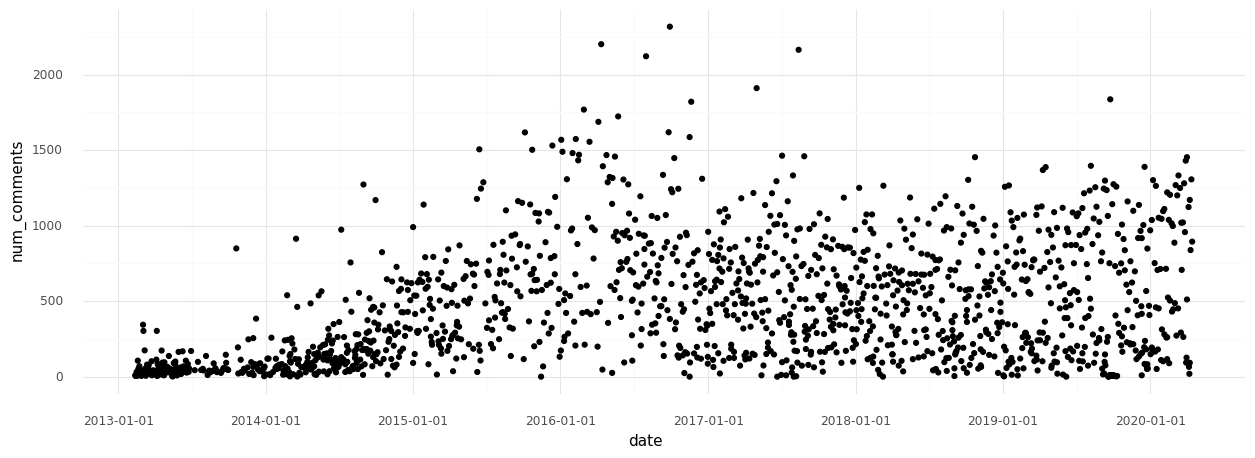

<ggplot: (-9223371898879301281)>

In [117]:
(ggplot(df, aes(x='date', y = 'num_comments'))
 +geom_point()
 +theme_minimal()
 +theme(figure_size=(15, 5)))

In [119]:
df.groupby(df.date.dt.strftime('%Y%W'))['num_comments'].sum()

date
201306      83
201307     326
201308     461
201309     571
201310     256
          ... 
202011    3039
202012    3930
202013    3306
202014    3490
202015     894
Name: num_comments, Length: 376, dtype: int32

In [120]:
all_text = df['content'].sum()

In [123]:
#expand contractions
all_text = ' '.join([contractions.fix(w) for w in all_text.split()])
# split into words
tokens = word_tokenize(all_text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation
tokens = [w for w in tokens if w not in string.punctuation] 
# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [124]:
cleaned_text = ' '.join(tokens)

In [125]:
len(tokens)

1390870

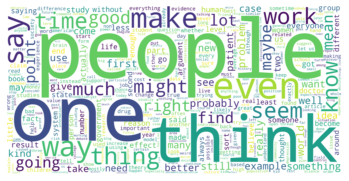

In [131]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', width= 4000, height = 2000, max_words = 400).generate(cleaned_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [127]:
wordcloud.to_file('../../wordclouds/ssc_wordcloud.jpg')

In [129]:
len(wordcloud.words_)

400

In [132]:
df.to_pickle('../../data/ssc/ssc_cleaned.pkl')

In [133]:
with open('../../data/ssc/ssc_for_gpt2.txt', 'w+', encoding='utf-8') as f:
    for _, row in df.iterrows():
        f.write(row['title'] + '\n')
        f.write(row['content'] + '\n')